In [45]:
import mmlspark
import numpy as np
from mmlspark.opencv import toNDArray
from mmlspark.io import *
import pyspark
from pyspark.sql import SparkSession
from PIL import Image

In [24]:
spark = SparkSession \
        .builder.master("local[*]") \
        .appName("image") \
        .getOrCreate()

In [25]:
image_df = spark.read.format("image").load("1.jpg")
image_df.printSchema()
print(image_df.count())

root
 |-- image: struct (nullable = true)
 |    |-- origin: string (nullable = true)
 |    |-- height: integer (nullable = true)
 |    |-- width: integer (nullable = true)
 |    |-- nChannels: integer (nullable = true)
 |    |-- mode: integer (nullable = true)
 |    |-- data: binary (nullable = true)

1


## Transform images

In [26]:
from mmlspark.opencv import ImageTransformer
tr = (ImageTransformer()                  # images are resized and then cropped
      .setOutputCol("transformed")
      .resize(height = 200, width = 200)
      .crop(0, 0, height = 180, width = 180) )
small = tr.transform(image_df).select("transformed")

In [27]:
image_df.select("image.origin", "image.width", "image.height",'image.nChannels').show(truncate=False)

+-----------------------+-----+------+---------+
|origin                 |width|height|nChannels|
+-----------------------+-----+------+---------+
|file:///notebooks/1.jpg|556  |353   |3        |
+-----------------------+-----+------+---------+



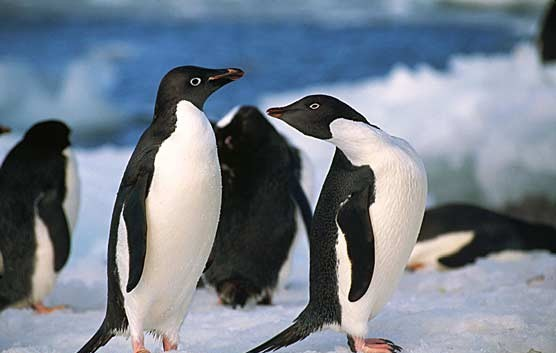

In [48]:
im = image_df.take(1)[0][0]
arr = toNDArray(im)
Image.fromarray(arr, "RGB")

In [28]:
small.select("transformed.origin", "transformed.width"
             ,"transformed.height",'transformed.nChannels').show(truncate=False)

+-----------------------+-----+------+---------+
|origin                 |width|height|nChannels|
+-----------------------+-----+------+---------+
|file:///notebooks/1.jpg|180  |180   |3        |
+-----------------------+-----+------+---------+



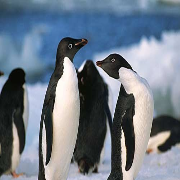

In [47]:
im = small.take(1)[0][0]
arr = toNDArray(im)
Image.fromarray(arr, "RGB")  # display the image inside notebook